# Projeto - Relatório de fechamento de mercado por e-mail.


### Desafio:

* Construir um e-mail que chegue na caixa de entrada todos os dias com informações de fechamento do Ibovespa e dólar.

<br>

   **Passo 1** - Importar os módulos e bibliotecas.
   
   **Passo 2** - Pegar dados do Ibovespa e do Dólar no Yahoo Finance.
   
   **Passo 3** - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.
   
   **Passo 4** - Calcular o retorno diário, mensal e anual.
   
   **Passo 5** - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto  anexado no e-mail.
   
   **Passo 6** - Fazer os gráficos dos ativos.
   
   **Passo 7** - Enviar o e-mail.

In [1]:
!pip install pywin32

In [2]:
!pip install pandas
!pip install yfinance
!pip install matplotlib
!pip install mplcyberpunk

     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     - -------------------------------------- 0.3/10.3 MB 6.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.9/10.3 MB 11.0 MB/s eta 0:00:01
     ----- ---------------------------------- 1.4/10.3 MB 12.7 MB/s eta 0:00:01
     -------- ------------------------------- 2.2/10.3 MB 11.8 MB/s eta 0:00:01
     ------------ --------------------------- 3.3/10.3 MB 13.9 MB/s eta 0:00:01
     ------------ --------------------------- 3.3/10.3 MB 14.0 MB/s eta 0:00:01
     ----------------- ---------------------- 4.4/10.3 MB 13.4 MB/s eta 0:00:01
     ------------------ --------------------- 4.6/10.3 MB 13.5 MB/s eta 0:00:01
     ---------------------- ----------------- 5.8/10.3 MB 13.7 MB/s eta 0:00:01
     ------------------------- -------------- 6.6/10.3 MB 14.5 MB/s eta 0:00:01
     -------------------------- ------------- 6.8/10.3 MB 13.6 MB/s eta 0:00:01
     --------------------------- ------------ 7.1

  DEPRECATION: frozendict is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB 1.9 MB/s eta 0:00:04
     - -------------------------------------- 0.3/7.6 MB 3.5 MB/s eta 0:00:03
     - -------------------------------------- 0.3/7.6 MB 3.5 MB/s eta 0:00:03
     - -------------------------------------- 0.3/7.6 MB 2.0 MB/s eta 0:00:04
     - -------------------------------------- 0.3/7.6 MB 1.7 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/7.6 MB 2.1 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/7.6 MB 2.6 MB/s eta 0:00:03
     ----- ---------------------------------- 1.1/7.6 MB 3.0 MB/s eta 0:00:03
     -------- ------------------------------- 1.7/7.6 MB 4.2 MB/s eta 0:00:02
     ------------ --------------------------- 2.3/7.6 MB 5.1 MB/s eta 0:00:02
     --------------- ------------------------ 2.9/7.6 MB 6.0 MB/s eta 0:00:01
     ----------------- ---------------------- 3.3/7.6 MB 6.1 MB/s eta 0

# Passo 1: Importando os módulos necessários

In [3]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32

# Passo 2: Pegar dados no Yahoo Finance

In [11]:
codigos_de_negociacao = ["^BVSP", "BRL=X"]  

hoje = datetime.datetime.now()
cinco_anos_atras = hoje - datetime.timedelta(days = 5*365)

dados_mercado = yf.download(codigos_de_negociacao, cinco_anos_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               BRL=X          ^BVSP   BRL=X          ^BVSP   BRL=X   
Date                                                                 
2018-03-05    3.2496   86023.000000  3.2496   86023.000000  3.2623   
2018-03-06    3.2410   85653.000000  3.2410   85653.000000  3.2428   
2018-03-07    3.2080   85484.000000  3.2080   85484.000000  3.2395   
2018-03-08    3.2429   84985.000000  3.2429   84985.000000  3.2652   
2018-03-09    3.2661   86371.000000  3.2661   86371.000000  3.2674   
...              ...            ...     ...            ...     ...   
2023-02-27    5.2078  105711.000000  5.2078  105711.000000  5.2108   
2023-02-28    5.1997  104932.000000  5.1997  104932.000000  5.2399   
2023-03-01    5.2359  104385.000000  5.2359  104385.000000  5.2367   
2023-03-02    5.1783  103326.000000  5.1783  103326.000000  5.2258   
2023-03-03       NaN  104323.703125     NaN  104323.703125     NaN   

                                Low                   Open                 \
                    ^BVSP     BRL=X          ^BVSP   BRL=X          ^BVSP   
Date                                                                        
2018-03-05   86165.000000  3.249400   85053.000000  3.2505   85292.000000   
2018-03-06   86931.000000  3.216300   85653.000000  3.2410   86023.000000   
2018-03-07   85653.000000  3.206100   84397.000000  3.2064   85653.000000   
2018-03-08   85830.000000  3.208700   84491.000000  3.2413   85510.000000   
2018-03-09   86389.000000  3.238800   84749.000000  3.2661   84987.000000   
...                   ...       ...            ...     ...            ...   
2023-02-27  106402.000000  5.168874  105227.000000  5.2078  105807.000000   
2023-02-28  106794.000000  5.180500  104932.000000  5.1997  105706.000000   
2023-03-01  105497.000000  5.188100  103105.000000  5.2359  104933.000000   
2023-03-02  104912.000000  5.174952  103321.000000  5.1783  104375.000000   
2023-03-03  104440.117188       NaN  103322.710938     NaN  103325.609375   

           Volume              
            BRL=X       ^BVSP  
Date                           
2018-03-05    0.0   3425200.0  
2018-03-06    0.0   3608600.0  
2018-03-07    0.0   3456800.0  
2018-03-08    0.0   3694700.0  
2018-03-09    0.0   3481500.0  
...           ...         ...  
2023-02-27    0.0   9570700.0  
2023-02-28    0.0  15672400.0  
2023-03-01    0.0  19853000.0  
2023-03-02    0.0  14738800.0  
2023-03-03    NaN         0.0  

[1305 rows x 12 columns]

# Passo 3.1: Manipulando os dados - seleção e exclusão de dados 

In [13]:
dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['dolar', 'ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2018-03-05,3.2496,86023.0
2018-03-06,3.2410,85653.0
2018-03-07,3.2080,85484.0
2018-03-08,3.2429,84985.0
2018-03-09,3.2661,86371.0
...,...,...
2023-02-24,5.1362,105873.0
2023-02-27,5.2078,105711.0
2023-02-28,5.1997,104932.0


# Passo 3.2: Manipulando os dados - Criando tabelas com outros timeframes. 

In [5]:
dados_anuais = dados_fechamento.resample("Y").last()

dados_mensais = dados_fechamento.resample("M").last()

print(dados_anuais)

print(dados_mensais)

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.2063,111709.0


# Passo 4 - Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos. 

In [6]:
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

retorno_diario

,dolar,ibovespa
Date,,
2022-01-25,0.005314,0.019424
2022-01-26,-0.008275,0.015731
2022-01-27,-0.002121,0.006650
2022-01-28,-0.004730,-0.007452
2022-01-31,-0.007566,0.008163
...,...,...
2023-01-17,0.012853,0.020382
2023-01-18,-0.009017,0.009090
2023-01-19,0.016805,0.004927


# Passo 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano.

* loc -> referenciar elementos a partir do nome
* iloc -> selecionar elementos como uma matriz

In [7]:
# retorno_jan_26_2022 = retorno_diario.loc['2022-01-26', 'dolar']
# retorno_jan_26_2022_iloc = retorno_diario.iloc[1, 0]

retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibov = retorno_diario.iloc[-1, 1]

retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]

print(retorno_anual_dolar)
display(retorno_anual)

-0.011487078643547255


,dolar,ibovespa
Date,,
2023-12-31,-0.011487,0.01525


In [8]:
retorno_diario_dolar = round((retorno_diario_dolar * 100), 2)
retorno_diario_ibov = round((retorno_diario_ibov * 100), 2)

retorno_mensal_dolar = round((retorno_mensal_dolar * 100), 2)
retorno_mensal_ibov = round((retorno_mensal_ibov * 100), 2) 

retorno_anual_dolar = round((retorno_anual_dolar * 100), 2)
retorno_anual_ibov = round((retorno_anual_ibov * 100), 2)

# Passo 6 - Fazer os gráficos da performance do último dos ativos

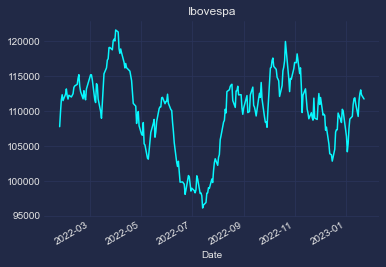

In [9]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "ibovespa", use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

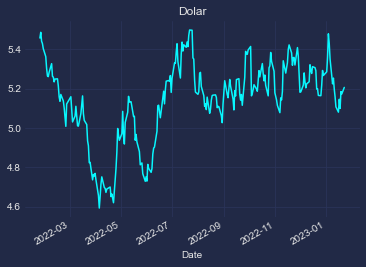

In [10]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "dolar", use_index = True, legend = False)

plt.title("Dolar")

plt.savefig('dolar.png', dpi = 300)

plt.show()

# Passo 7: Enviar e-mail

In [12]:
outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)

In [13]:
email.To = "brenno@varos.com.br"
email.Subject = "Relatório Diário"
email.Body = f'''Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_anual_ibov}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_ibov}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_diario_ibov}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_anual_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_diario_dolar}%.


Abs,

O melhor estagiário do mundo

'''

anexo_ibovespa = r'C:\Users\lsiqu\botcamp202302\ibovespa.png'
anexo_dolar = r'C:\Users\lsiqu\botcamp202302\dolar.png'

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)

email.Send()
